#                                       ASSIGNMENT

In [1]:
# IMPORTING PACKAGES
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# LOADING DATASET

In [2]:
#IMPORTING DATASET
dataset = pd.read_csv("C:/Users/Administrator/Documents/Arun/InterviewTest.csv")

In [3]:
# Head of dataset
dataset.head()

,A,B,C,D,E,F,G,H,I,Binary
0,6813.43,0.01,3214.35,90.72,0.0,115.0,0.0,0.0,80.0,False
1,6813.43,0.01,3214.35,90.72,0.0,117.4,0.0,0.0,80.0,False
2,6813.43,0.01,3214.35,90.72,0.0,115.3,0.0,0.0,80.0,False
3,6813.43,0.01,3214.35,90.72,0.0,116.4,0.0,0.0,79.0,False
4,6813.43,0.01,3214.35,90.72,0.0,116.4,0.0,0.0,78.0,False


In [4]:
# Shape of dataset
dataset.shape
# So, the dataset contains 10 columns and 86341 records
# 9 independent variables and 1 target variable 'Binary'

(86341, 10)

In [5]:
#RENAMING TARGET ATTRIBUTE NAME AS Target
dataset = dataset.rename(index=str, columns={"Binary": "Target"})

In [6]:
# REPLACING FALSE = 0 and TRUE = 1
dataset.loc[dataset["Target"].astype(str) == 'False', 'Target'] = '0'
dataset.loc[dataset["Target"].astype(str) == 'True', 'Target'] = '1'

# DESCRIPTIVE STATISTICS

In [7]:
# Summarizing the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
dataset.describe()

,A,B,C,D,E,F,G,H,I
count,86341.000000,86341.000000,86341.000000,86341.000000,86341.000000,86341.000000,86341.000000,86341.000000,86341.000000
mean,7301.101464,11.671432,7057.825031,46.184679,6.102335,193.009552,94.168865,14589.581763,2270.765592
std,470.019541,8.795040,996.846036,35.592912,10.582727,31.888536,77.929572,11738.389829,1138.337244
min,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,6862.830000,11.560000,6848.330000,11.780000,0.000000,193.300000,0.000000,0.000000,1864.000000
50%,7144.680000,14.930000,7143.530000,46.410000,0.000000,199.100000,81.000000,14417.000000,2876.000000
75%,7690.030000,14.990000,7676.290000,82.870000,14.300000,210.000000,166.000000,23562.000000,3099.000000
max,8186.380000,15.260000,8186.380000,100.060000,104.300000,274.200000,204.000000,56382.000000,3543.000000


In [8]:
# From the descriptive statistics it is evident that the Data has Anamoly containing -999.25 in all columns
# Checking for -999.25 in each column
dataset[dataset['A'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [9]:
dataset[dataset['B'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [10]:
dataset[dataset['C'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [11]:
dataset[dataset['D'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [12]:
dataset[dataset['E'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [13]:
dataset[dataset['F'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [14]:
dataset[dataset['G'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [15]:
dataset[dataset['H'] == -999.25]

,A,B,C,D,E,F,G,H,I,Target
50338,7395.63,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50339,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
50340,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
78158,8050.89,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1


In [16]:
# Columns A, B, C, D, E, F, G, H and I have -999.25 has Minimum which is unusual for the distribution. 
# It looks like these are Anamolies in data
# Remove '-999.25'
for i in dataset:
    dataset = dataset[dataset[i] != -999.25]

In [17]:
dataset.dtypes # Target is bool 

A         float64
B         float64
C         float64
D         float64
E         float64
F         float64
G         float64
H         float64
I         float64
Target     object
dtype: object

In [18]:
# Checking Central measures of Tendency again
dataset.describe()

,A,B,C,D,E,F,G,H,I
count,86337.000000,86337.000000,86337.000000,86337.000000,86337.000000,86337.000000,86337.000000,86337.000000,86337.000000
mean,7301.283963,11.718268,7058.198316,46.233114,6.148913,193.064789,94.219523,14590.303995,2270.917092
std,468.322498,5.477772,995.359382,34.875140,8.072746,30.839336,77.575161,11738.182153,1138.145984
min,6813.430000,0.000000,3213.200000,-3.810000,-14.600000,87.600000,0.000000,0.000000,48.000000
25%,6862.830000,11.560000,6848.350000,11.780000,0.000000,193.300000,0.000000,0.000000,1864.000000
50%,7144.680000,14.930000,7143.530000,46.420000,0.000000,199.100000,81.000000,14419.000000,2876.000000
75%,7690.030000,14.990000,7676.330000,82.870000,14.300000,210.000000,166.000000,23563.000000,3099.000000
max,8186.380000,15.260000,8186.380000,100.060000,104.300000,274.200000,204.000000,56382.000000,3543.000000


In [19]:
#Checking for NULL values
dataset.isnull().any().any()

False

The dataset has No NULL values

In [20]:
# Checking for Class Imbalance in Target variable 
dataset['Target'].value_counts()*100/dataset.shape[0]

1    54.030138
0    45.969862
Name: Target, dtype: float64

The distribution of Target variable is approx 50:50 removing the problem of Class Imbalance

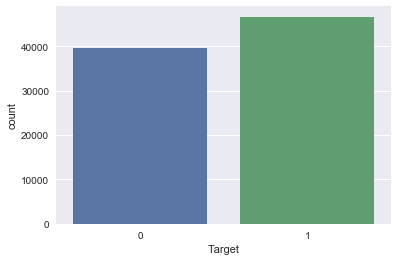

In [21]:
sns.countplot(dataset['Target'])
plt.show()

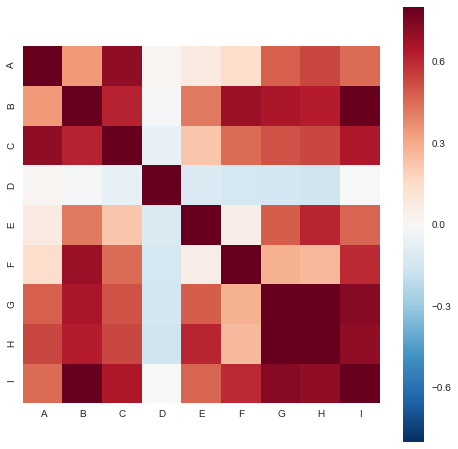

In [22]:
# plotting the correlation matrix
corrmat = dataset.corr()
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [23]:
# So Checking how the G and H Attributes are related
dataset.corr(method='pearson')

,A,B,C,D,E,F,G,H,I
A,1.000000,0.349601,0.712135,0.013616,0.072178,0.148045,0.479538,0.534234,0.454803
B,0.349601,1.000000,0.616159,-0.018214,0.424143,0.691076,0.650085,0.626013,0.968727
C,0.712135,0.616159,1.000000,-0.066057,0.219983,0.452352,0.509368,0.536238,0.649850
D,0.013616,-0.018214,-0.066057,1.000000,-0.114726,-0.143282,-0.149232,-0.158109,-0.005389
E,0.072178,0.424143,0.219983,-0.114726,1.000000,0.052919,0.486973,0.607303,0.467651
F,0.148045,0.691076,0.452352,-0.143282,0.052919,1.000000,0.284818,0.257520,0.593873
G,0.479538,0.650085,0.509368,-0.149232,0.486973,0.284818,1.000000,0.913615,0.730676
H,0.534234,0.626013,0.536238,-0.158109,0.607303,0.257520,0.913615,1.000000,0.708864
I,0.454803,0.968727,0.649850,-0.005389,0.467651,0.593873,0.730676,0.708864,1.000000


In [24]:
# Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one
# direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute 
#  has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. 

In [25]:
skew = dataset.skew() 
print(skew)

A         0.491532
B        -1.462501
C        -2.036795
D         0.018434
E         1.045814
F        -1.705265
G         0.022092
H         0.091583
I        -1.108819
Target   -0.161735
dtype: float64


In [26]:
# Taking one out of G and H attribute.Correlation Based Feature Selection 
# Taking one out of B and I attribute.Correlation Based Feature Selection 
# Pearson’s correlation coefficient
del dataset['H']
del dataset['I']

HISTOGRAM OF A


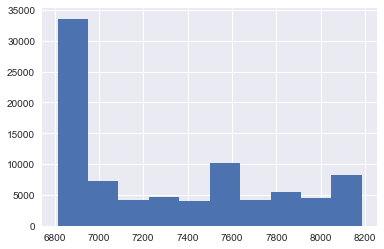

HISTOGRAM OF B


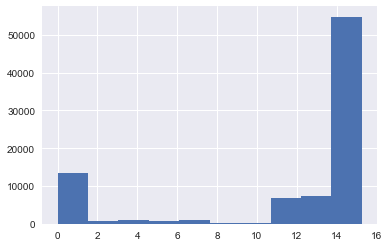

HISTOGRAM OF C


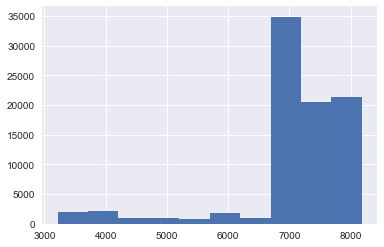

HISTOGRAM OF D


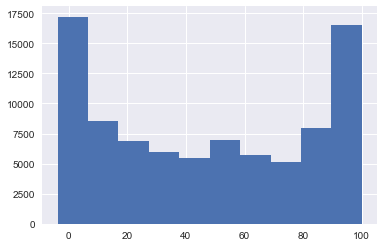

HISTOGRAM OF E


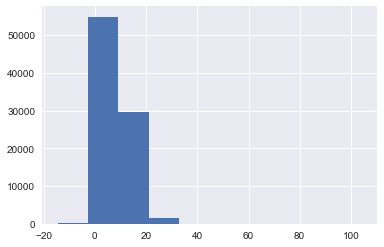

HISTOGRAM OF F


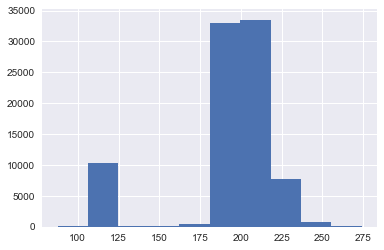

HISTOGRAM OF G


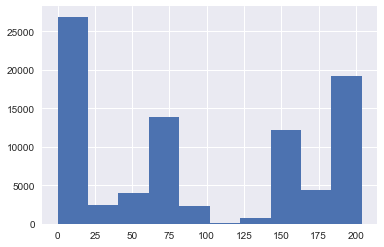

In [27]:
for i in dataset:
    if dataset[i].dtype == 'int64'or dataset[i].dtype =='float64':
        plt.hist(dataset[i])
        print("HISTOGRAM OF %s" % i)
        plt.show()        

In [28]:
dataset['Target'] = dataset['Target'].astype(int)

In [29]:
dataset.dtypes

A         float64
B         float64
C         float64
D         float64
E         float64
F         float64
G         float64
Target      int32
dtype: object

# SPLITTING INDEPENDENT AND TARGET VARIABLE

In [33]:
# Creating Independent and Dependent Variable
target = ['Target']
X = dataset.drop(target, axis = 1)
y = pd.DataFrame(dataset[target])

In [34]:
print("Number of %s Records and %s Columns in Independent Attributes - X" % (X.shape[0], X.shape[1]))
print("Number of %s Records and %s Columns in Target Variable - y" % (y.shape[0], y.shape[1]))

Number of 86337 Records and 7 Columns in Independent Attributes - X
Number of 86337 Records and 1 Columns in Target Variable - y


# Feature Extraction

In [35]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False False  True  True False]
Feature Ranking: [4 1 5 2 1 1 3]


RFE selected B,E and F attributes as top 3 important

In [36]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print("Important Features:",model.feature_importances_)

Important Features: [ 0.12172234  0.24717739  0.09649933  0.14690426  0.06356283  0.0837355
  0.24039836]


Extra Trees Classifier selected B, D, E and G

# Evaluating ML model using Train-Test Sets 

In [37]:
# Splitting dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Number of %s Records and %s Columns in X_train" % (X_train.shape[0], X_train.shape[1]))
print("Number of %s Records and %s Columns in y_train" % (y_train.shape[0], y_train.shape[1]))
print("Number of %s Records and %s Columns in X_test" % (X_test.shape[0], X_test.shape[1]))
print("Number of %s Records and %s Columns in y_test" % (y_test.shape[0], y_test.shape[1]))

Number of 64752 Records and 7 Columns in X_train
Number of 64752 Records and 1 Columns in y_train
Number of 21585 Records and 7 Columns in X_test
Number of 21585 Records and 1 Columns in y_test


In [38]:
#SPLIT RATIO
print("TEST DATASET % :",round(X_test.shape[0]/X.shape[0],1))
print("TRAIN DATASET % :",1-(round(X_test.shape[0]/X.shape[0],1)))

TEST DATASET % : 0.3
TRAIN DATASET % : 0.7


# STANDARDIZATION OF DATASET

In [39]:
#Gaussian with 0 mean and unit variance.
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

HISTOGRAM OF 0


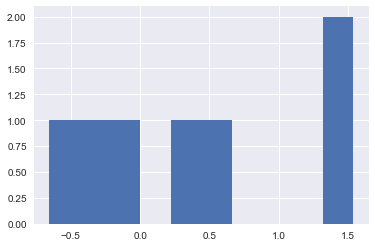

HISTOGRAM OF 1


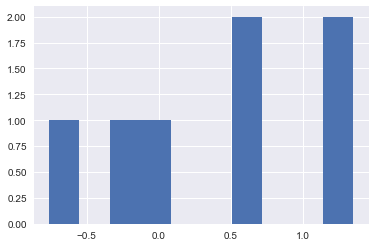

HISTOGRAM OF 2


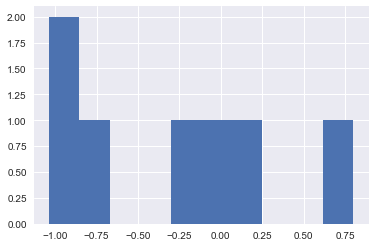

HISTOGRAM OF 3


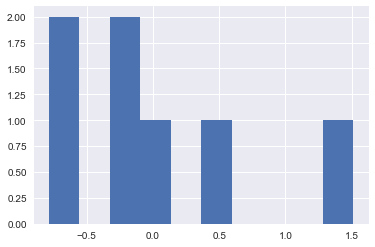

HISTOGRAM OF 4


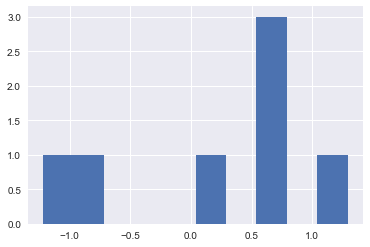

HISTOGRAM OF 5


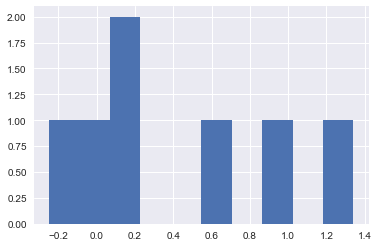

HISTOGRAM OF 6


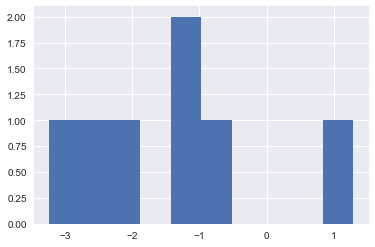

In [41]:
for i in pd.DataFrame(X_train):
    plt.hist(pd.DataFrame(X_train[i]))
    print("HISTOGRAM OF %s" % i)
    plt.show()
    

HISTOGRAM OF 0


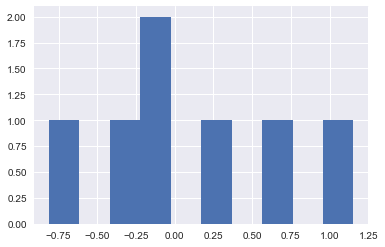

HISTOGRAM OF 1


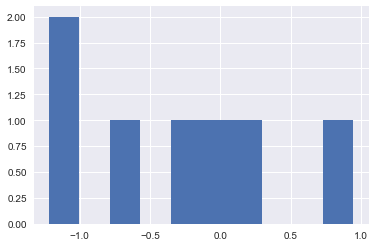

HISTOGRAM OF 2


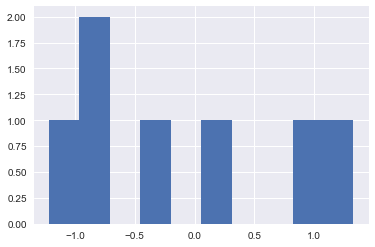

HISTOGRAM OF 3


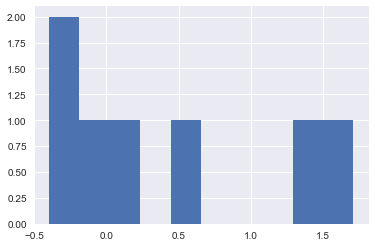

HISTOGRAM OF 4


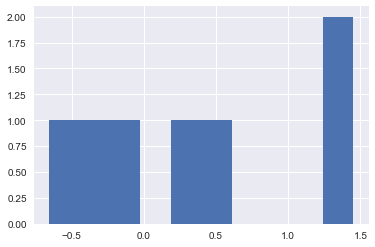

HISTOGRAM OF 5


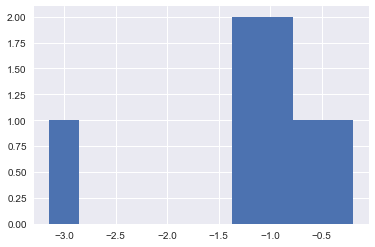

HISTOGRAM OF 6


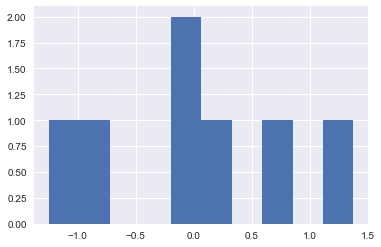

In [42]:
for i in pd.DataFrame(X_test):
    plt.hist(pd.DataFrame(X_test[i]))
    print("HISTOGRAM OF %s" % i)
    plt.show()

In [43]:
scaler = StandardScaler().fit(X) 
X = scaler.transform(X)

# RUNNING MODELS

In [86]:
'''# 1. MLPClassifier 2. SVM 3. XGBoost 4.DecisionTree Classifier 5. RandomForest Classifier 6. AdaBoost Classifier
#7.Gradient Boosting Classifier 8.Logistic Regression'''

'# 1. MLPClassifier 2. SVM 3. XGBoost 4.DecisionTree Classifier 5. RandomForest Classifier 6. AdaBoost Classifier\n#7.Gradient Boosting Classifier 8.Logistic Regression'

In [55]:
#MLPClassifier
mlp = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 200, solver = 'adam',hidden_layer_sizes=(100,50,10,5))
mlp.fit(X_train,y_train)
svm = SVC(kernel = 'sigmoid')
svm.fit(X_train,y_train)
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=1, random_state=0)
gbc.fit(X_train,y_train)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
'''
CLASSIFICATION METRICS
# 1.Classification Accuracy.
# 2.Logarithmic Loss.
# 3.Area Under ROC Curve.
# 4.Confusion Matrix.
# 5.Classification Report.
'''

'\nCLASSIFICATION METRICS\x88\n# 1.Classification Accuracy.\n\x88# 2.Logarithmic Loss.\n\x88# 3.Area Under ROC Curve.\n\x88# 4.Confusion Matrix.\n\x88# 5.Classification Report.\n'

MLP CLASSIFIER:

Accuracy: 0.969747509845

Logarithmic loss: 1.0448938466



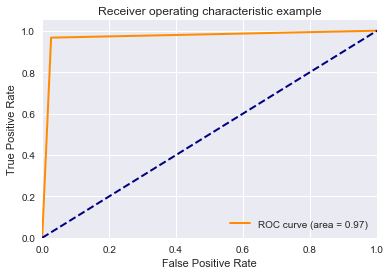


Confusion Matrix:
[[ 9729   266]
 [  387 11203]]

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      9995
          1       0.98      0.97      0.97     11590

avg / total       0.97      0.97      0.97     21585




SUPPORT VECTOR MACHINES:
Acuracy: 0.802733379662
Logarithmic loss: 6.8134283351



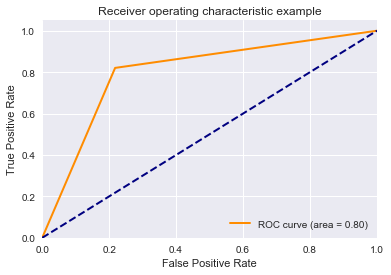


Confusion Matrix:
[[7818 2177]
 [2081 9509]]

Classification Report:
             precision    recall  f1-score   support

          0       0.79      0.78      0.79      9995
          1       0.81      0.82      0.82     11590

avg / total       0.80      0.80      0.80     21585



XGBOOST:

Accuracy: 0.971369006254
Logarithmic loss: 0.988893086139



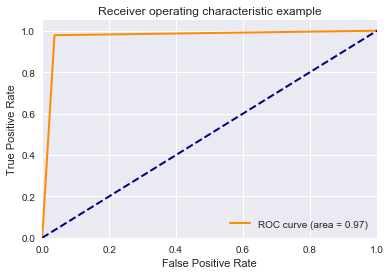



Confusion Matrix:
[[ 9628   367]
 [  251 11339]]


Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      9995
          1       0.97      0.98      0.97     11590

avg / total       0.97      0.97      0.97     21585



DECISION TREE:


Accuracy: 0.993282372018


Logarithmic loss: 0.232020540038




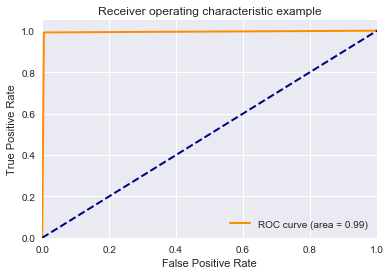



Confusion Matrix:
[[ 9944    51]
 [   94 11496]]

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      9995
          1       1.00      0.99      0.99     11590

avg / total       0.99      0.99      0.99     21585

GRADIENT BOOSTING CLASSIFIER:
Accuracy: 0.878017141533
Logarithmic loss: 4.21323554297



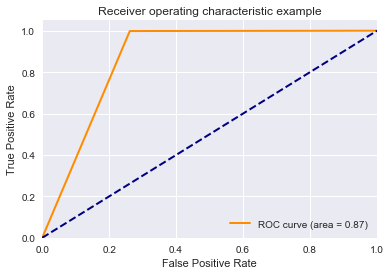


Confusion Matrix:
[[ 7380  2615]
 [   18 11572]]

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.74      0.85      9995
          1       0.82      1.00      0.90     11590

avg / total       0.90      0.88      0.88     21585



Logistic:

Accuracy: 0.854296965485
Logarithmic loss: 5.03247717269



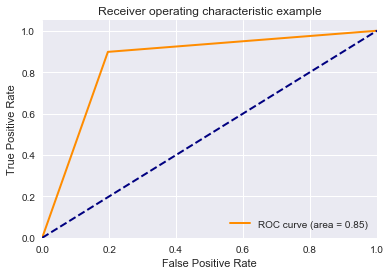


Confusion Matrix:
[[ 8034  1961]
 [ 1184 10406]]

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.80      0.84      9995
          1       0.84      0.90      0.87     11590

avg / total       0.86      0.85      0.85     21585





In [57]:
n_classes = 1
#print(n_classes)
predictions_mlp = mlp.predict(X_test)
print("MLP CLASSIFIER:")
print("")
#Accuracy
print("Accuracy:",accuracy_score(y_test, predictions_mlp))
print("")
print("Logarithmic loss:", log_loss(y_test, predictions_mlp))
print("")
y_score_mlp=pd.DataFrame(predictions_mlp)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score_mlp[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()    
print("")
print("Confusion Matrix:")   
print(confusion_matrix(y_test,predictions_mlp))
print("")
print("Classification Report:")
print(classification_report(y_test,predictions_mlp))

print()
print("")
print("")

predictions_svm = svm.predict(X_test)
print("SUPPORT VECTOR MACHINES:")
print("Acuracy:",accuracy_score(y_test, predictions_svm))
print("Logarithmic loss:", log_loss(y_test, predictions_svm))
print("")
y_score_svm=pd.DataFrame(predictions_svm)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score_svm[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions_svm))
print("")
print("Classification Report:")
print(classification_report(y_test,predictions_svm))

print("")
print("")


predictions_xgb = xgb_model.predict(X_test)
print("XGBOOST:")
print("")
print("Accuracy:",accuracy_score(y_test, predictions_xgb))
print("Logarithmic loss:", log_loss(y_test, predictions_xgb))
print("")
y_score_xgb=pd.DataFrame(predictions_xgb)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score_xgb[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 
print("")
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions_xgb))
print("")
print("")
print("Classification Report:")
print(classification_report(y_test,predictions_xgb))

print("")
print("")

predictions_dt = dt.predict(X_test)
print("DECISION TREE:")
print("")
print("")
print("Accuracy:",accuracy_score(y_test, predictions_dt))
print("")
print("")
print("Logarithmic loss:", log_loss(y_test, predictions_dt))
print("")
print("")
y_score_dt=pd.DataFrame(predictions_dt)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score_dt[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print("")
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions_dt))
print("")
print("Classification Report:")
print(classification_report(y_test,predictions_dt))



predictions_gbc = gbc.predict(X_test)
print("GRADIENT BOOSTING CLASSIFIER:")
print("Accuracy:",accuracy_score(y_test, predictions_gbc))
print("Logarithmic loss:", log_loss(y_test, predictions_gbc))
print("")
y_score_gbc=pd.DataFrame(predictions_gbc)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score_gbc[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions_gbc))
print("")
print("Classification Report:")
print(classification_report(y_test,predictions_gbc))

print("")
print("")

predictions_logistic = logistic.predict(X_test)
print("Logistic:")
print("")
print("Accuracy:",accuracy_score(y_test, predictions_logistic))
print("Logarithmic loss:", log_loss(y_test, predictions_logistic))
print("")
y_score_logistic=pd.DataFrame(predictions_logistic)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score_logistic[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions_logistic))
print("")
print("Classification Report:")
print(classification_report(y_test,predictions_logistic))

print("")
print("")

# MODEL COMPARISION

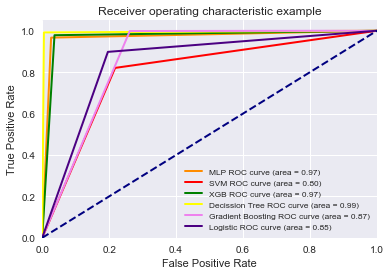

In [58]:
plt.figure()
lw = 2

#MLP Classifier
y_score = pd.DataFrame(mlp.predict(X_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='MLP ROC curve (area = %0.2f)' % roc_auc[0])



#SVM Classifier
y_score = pd.DataFrame(svm.predict(X_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='SVM ROC curve (area = %0.2f)' % roc_auc[0])


#XGB Classifier
y_score = pd.DataFrame(xgb_model.predict(X_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='green',
         lw=lw, label='XGB ROC curve (area = %0.2f)' % roc_auc[0])


#Decission Tree Classifier
y_score = pd.DataFrame(dt.predict(X_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='yellow',
         lw=lw, label='Decission Tree ROC curve (area = %0.2f)' % roc_auc[0])


#Gradient Boosting Classifier
y_score = pd.DataFrame(gbc.predict(X_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='violet',
         lw=lw, label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc[0])


#Logistic Classifier
y_score = pd.DataFrame(logistic.predict(X_test))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test["Target"], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.plot(fpr[0], tpr[0], color='indigo',
         lw=lw, label='Logistic ROC curve (area = %0.2f)' % roc_auc[0])



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
plt.legend(prop=fontP)

#plt.legend(loc="lower right")

plt.show()

# K-fold Cross Validation

Name of Algorithm: LR, Mean of CV results: 0.745996, Standard deviation of CV results: (0.259158)
Name of Algorithm: MLP, Mean of CV results: 0.863062, Standard deviation of CV results: (0.155056)
Name of Algorithm: XGB, Mean of CV results: 0.916384, Standard deviation of CV results: (0.090522)
Name of Algorithm: DT, Mean of CV results: 0.847411, Standard deviation of CV results: (0.184550)
Name of Algorithm: LDA, Mean of CV results: 0.738039, Standard deviation of CV results: (0.260811)
Name of Algorithm: KNN, Mean of CV results: 0.873496, Standard deviation of CV results: (0.112042)


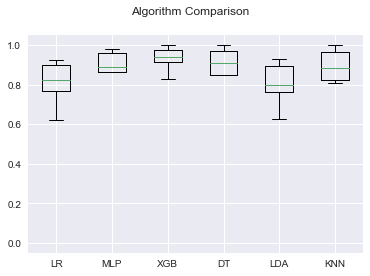

In [44]:
# prepare models 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('MLP', MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 200, solver = 'adam',hidden_layer_sizes=(100,50,10,5)))) 
#models.append(('SVC', SVC(kernel = 'sigmoid'))) 
models.append(('XGB', XGBClassifier())) 
models.append(('DT', DecisionTreeClassifier())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy' 
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Name of Algorithm: %s, Mean of CV results: %f, Standard deviation of CV results: (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
# boxplot algorithm comparison
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()
#box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm


# Improving Performance with Ensembles


In [46]:
#Here i want to use Ensemble techniques to Boost the accuracy of Model

In [47]:
#BAGGING ALGORITHMS 
#Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and 
#training a model for each sample. 
#The ﬁnal output prediction is averaged across the predictions of all of the sub-models. 

In [48]:
# 1.  Bagged Decision Trees.
# 2.  Random Forest.
# 3.  Extra Trees

In [49]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
#Decision Tree Classifier
cart = DecisionTreeClassifier() 
num_trees = 100 
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, y, cv=kfold) 
print("Mean Accuracy Decision Tree Classifier using Bagging Technique",round(results.mean(),2))
# Random Forests
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, y, cv=kfold) 
print("Mean Accuracy Random Forest Classifier",round(results.mean(),2))
#Extra Trees Classifier
max_features = 7 
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print("Mean Accuracy Extra Trees Classifier",round(results.mean(),2))

Mean Accuracy Decision Tree Classifier using Bagging Technique 0.9
Mean Accuracy Random Forest Classifier 0.9
Mean Accuracy Extra Trees Classifier 0.92


In [50]:
#Boosting Algorithms

In [51]:
#1. AdaBoost.
#2. Stochastic Gradient Boosting


In [52]:
#AdaBoost
num_trees = 30 
seed=7 
kfold = KFold(n_splits=10, random_state=seed) 
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, y, cv=kfold) 
print("Mean Accuracy Adaboost: ", results.mean())
#Gradient Boosting Algorithm
seed = 7
num_trees = 100 
kfold = KFold(n_splits=10, random_state=seed) 
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, y, cv=kfold) 
print("Mean Accuracy Gradient Boosting Classifier: ",results.mean())


Mean Accuracy Adaboost:  0.922072716806
Mean Accuracy Gradient Boosting Classifier:  0.911542573263


In [53]:
#Voting Ensemble

In [54]:

# Taking lot of TIME
# create the sub models 
estimators = [] 
model1 = LogisticRegression() 
estimators.append(('logistic', model1)) 
model2 = DecisionTreeClassifier() 
estimators.append(('cart', model2)) 
#model3 = SVC() 
#estimators.append(('svm', model3)) 
# create the ensemble model 
ensemble = VotingClassifier(estimators) 
results = cross_val_score(ensemble, X, y, cv=kfold) 
print("Mean Estimate of Classification Accuracy:")
print(results.mean())



Mean Estimate of Classification Accuracy:
0.870227767239


# Improve Performance with Algorithm Tuning


In [101]:
#Machine Learning Algorithm Parameters
# 1. Grid Search Parameter Tuning
# 2. Random Search Parameter Tuning

In [102]:
# GRIDSEARCHCV : Grid Search Parameter Tuning
# Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination 
# of algorithm parameters speciﬁed in a grid

In [103]:
# '''Working'''

# OUTPUTS

In [104]:
y_test.index=pd.DataFrame(predictions_mlp).index
output = pd.concat([y_test,pd.DataFrame(predictions_mlp), pd.DataFrame(predictions_dt), pd.DataFrame(predictions_svm),pd.DataFrame(predictions_logistic),pd.DataFrame(predictions_xgb), pd.DataFrame(predictions_gbc)], axis= 1, ignore_index = True)
output.columns = ['ACTUAL', 'PREDICTED MLP', 'PREDICTED DT', 'PREDICTED SVM', 'PREDICTED LOGISTIC','PREDICTED XGB','PREDICTED GBC']

In [105]:
output.head()

,ACTUAL,PREDICTED MLP,PREDICTED DT,PREDICTED SVM,PREDICTED LOGISTIC,PREDICTED XGB,PREDICTED GBC
0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [106]:
output.to_csv("Output.csv")

# DESCRIPTION OF MY APPROACH